<a href="https://colab.research.google.com/github/BeePandey/Birendra_Info5731_Spring2021/blob/main/INFO5731_AssignmentFour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.



Question 1: Topic Modeling¶
(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to identify the top 10 topics in the dataset. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster.

In [41]:
# Read data
import pandas as pd
data = pd.read_csv("/content/sample_data/TrainingandEvaluationWest3.csv")

In [42]:
!pip install stop_words

In [43]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()


In [44]:
data['Lower Case'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['Tokenization'] = data['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
data['Tokens'] = data['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
data['Stemming'] = data['Tokens'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [45]:
texts = []
for line in data['Stemming']:
  texts.append(line)

In [46]:
from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['everi', 'movi', 'come', 'truli', 'make', 'impact', 'joaquin', 's', 'perform', 'scenographi', 's', 'brillianc', 'grotesqu', 'haunt', 'cringi', 'hard', 'watch', 'time', 'mesmer', 'won', 't', 'blink', 'eye', 'watch', 'tragic', 'serious', 'funni', 'moment', 'emot', 'rollercoast', 'sometim', 'multipl', 'emot', 'pop', 'time', 'far', 'typic', 'action', 'riddl', 'predict', 'super', 'hero', 'movi', 's', 'proper', 'psycholog', 'thriller', 'drama', 'singl', 'best', 'charact', 'develop', 'ever', 'seen']


In [47]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
  
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [48]:
import spacy
data_words_bigrams = make_bigrams(texts)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])


[['come', 'truli', 'make', 'impact', 'win', 'blink', 'eye', 'watch', 'tragic', 'serious', 'moment', 'pop', 'time', 'far', 'typic', 'predict', 'super', 'hero', 'proper', 'psycholog', 'drama', 'good', 'charact', 'develop', 'ever', 'see']]


In [32]:

id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]]


In [33]:
id2word[0]

'blink'

In [34]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


[[('blink', 1),
  ('charact', 1),
  ('come', 1),
  ('develop', 1),
  ('drama', 1),
  ('ever', 1),
  ('eye', 1),
  ('far', 1),
  ('good', 1),
  ('hero', 1),
  ('impact', 1),
  ('make', 1),
  ('moment', 1),
  ('pop', 1),
  ('predict', 1),
  ('proper', 1),
  ('psycholog', 1),
  ('see', 1),
  ('serious', 1),
  ('super', 1),
  ('time', 1),
  ('tragic', 1),
  ('truli', 1),
  ('typic', 1),
  ('watch', 1),
  ('win', 1)]]

In [35]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [36]:
#LDA
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.054*"mental" + 0.052*"son" + 0.010*"write" + 0.009*"direct" + '
  '0.008*"poor" + 0.007*"seem" + 0.006*"enjoy" + 0.006*"endgam" + '
  '0.006*"pretend" + 0.006*"club"'),
 (1,
  '0.045*"make" + 0.038*"even" + 0.030*"just" + 0.027*"joker" + 0.022*"differ" '
  '+ 0.019*"real" + 0.018*"scene" + 0.018*"comic" + 0.018*"will" + '
  '0.017*"know"'),
 (2,
  '0.069*"go" + 0.034*"lose" + 0.026*"give" + 0.021*"moment" + 0.019*"point" + '
  '0.018*"anoth" + 0.017*"rate" + 0.017*"plea" + 0.016*"ago" + 0.016*"second"'),
 (3,
  '0.060*"music" + 0.051*"costum" + 0.051*"oscar" + 0.050*"screenplay" + '
  '0.008*"perfect" + 0.006*"kind" + 0.005*"perform" + 0.003*"screen" + '
  '0.003*"short" + 0.003*"bring"'),
 (4,
  '0.096*"film" + 0.047*"peopl" + 0.040*"way" + 0.035*"make" + 0.034*"good" + '
  '0.031*"show" + 0.030*"wake" + 0.022*"much" + 0.019*"violent" + '
  '0.019*"play"'),
 (5,
  '0.061*"film" + 0.034*"forget" + 0.029*"deserv" + 0.028*"differ" + '
  '0.026*"main" + 0.022*"sure" + 0.020*"goo

In [38]:
lsamodel = models.LsiModel(corpus, num_topics = 10, id2word = id2word)

In [39]:
pprint(lsamodel.print_topics(num_topics = 10))

[(0,
  '0.527*"movi" + 0.227*"good" + 0.220*"just" + 0.209*"make" + 0.195*"see" + '
  '0.184*"feel" + 0.175*"film" + 0.151*"can" + 0.139*"say" + 0.134*"watch"'),
 (1,
  '-0.573*"film" + 0.337*"movi" + 0.259*"just" + -0.165*"peopl" + '
  '-0.128*"good" + -0.120*"violent" + -0.117*"may" + -0.114*"happen" + '
  '-0.110*"way" + -0.105*"feel"'),
 (2,
  '-0.452*"just" + 0.450*"movi" + -0.205*"even" + -0.176*"film" + '
  '0.175*"peopl" + -0.154*"watch" + -0.147*"look" + -0.136*"cinema" + '
  '-0.119*"go" + -0.109*"time"'),
 (3,
  '-0.284*"just" + 0.249*"go" + 0.248*"charact" + 0.232*"joker" + 0.175*"know" '
  '+ 0.170*"even" + -0.166*"good" + -0.156*"watch" + -0.153*"peopl" + '
  '0.150*"take"'),
 (4,
  '0.367*"also" + 0.254*"peopl" + 0.155*"even" + 0.153*"littl" + 0.152*"poor" '
  '+ -0.149*"will" + 0.143*"actual" + -0.137*"expect" + -0.134*"get" + '
  '0.132*"seem"'),
 (5,
  '0.284*"film" + 0.232*"good" + -0.228*"feel" + 0.205*"peopl" + '
  '-0.190*"superhero" + -0.187*"can" + 0.167*"go" + 

In [40]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.149158196133707

Coherence Score:  0.34053991901545044



Summerizing topic for each Cluster

LDA

Abstracts about NLP

About system understands Human Language

About visual approach and execution

About current languages and its goal

About which it consists like complex tasks and parts of it

About commputational linguistics

About which it uses like it uses text and logic

About the process development

About evaluation process and requirements

About research

LSA

Abstracts about development of Applications

About processing of web information

About tasks

About system learn nlp

About documents

About models

About results

About learn words and understanding

About approaches

About understanding tasks
> Indented block



# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [61]:
#The features used for this analysis are Tfid and bag of words.

#Bag of words and vector space refer to the different approaches of categorizing body of document.

#In Bag of words, you can extract only the unigram words to create unordered list of words without syntactic, semantic and POS tagging. This bunch of words represent the document.

#It is algebraic model used for representing documents as vectors. from the given bag of words you can create a feature document vector where each feature is a word and it’s value is term weight.

#TF-IDF is a feature vector, which points to a point in vector space such that there is an axis for every term in our bag.

Advantages of Feature selection before using Model:

#Reducing the number of features will surely reduce the computational complexity of the model.

#It might increase the accuracy of the model but not necessarily(Depends on type of data working on).

#Feature selection helps to filter noise from the dataset and that will benefit any algorithm.

#Feature selection can reduce overfitting and improve hold out performance.



In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification


In [69]:
np.random.seed(500)


In [72]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Cleaned Data'],df['Sentimental Analysis'],test_size=0.2) #20 percent test data and remaining for training


In [74]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
Tfidf_vect = TfidfVectorizer(ngram_range=(1,2),max_features=500)   #Here selected top 1000 1-gram and 2-gram features 
#Tfidf_vect = TfidfVectorizer(max_features=1000)
Tfidf_vect.fit(df['Cleaned Data'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [75]:
print(list(Tfidf_vect.vocabulary_.keys())[:500]) #Features selected for classification

['everi', 'movi', 'come', 'truli', 'make', 'joaquin', 'perform', 'cring', 'hard', 'watch', 'time', 'wont', 'serious', 'moment', 'emot', 'sometim', 'multipl', 'far', 'typic', 'predict', 'superhero', 'proper', 'psycholog', 'best', 'charact', 'develop', 'ever', 'seen', 'joaquin perform', 'superhero movi', 'charact develop', 'felt', 'alon', 'relat', 'understand', 'feel', 'lot', 'peopl', 'see', 'think', 'violenc', 'one', 'becom', 'better', 'person', 'everyon', 'like', 'world', 'instead', 'see movi', 'make feel', 'feel like', 'masterpiec', 'hollywood', 'film', 'decad', 'bring', 'comic', 'book', 'realist', 'real', 'direct', 'cinematographi', 'music', 'act', 'surpris', 'find', 'disturb', 'violent', 'messag', 'societi', 'someth', 'way', 'show', 'class', 'differ', 'rich', 'talent', 'other', 'around', 'that', 'believ', 'could', 'joke', 'live', 'much', 'consid', 'wake', 'call', 'first', 'perfect', 'one best', 'best film', 'comic book', 'cinematographi music', 'phoenix', 'give', 'de', 'forc', 'stun

In [76]:

# 2.2)
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
target_names = ['Positive', 'Negative', 'Neutral']
print(classification_report(Test_Y, predictions_NB,target_names=target_names))

              precision    recall  f1-score   support

    Positive       1.00      0.20      0.33         5
    Negative       0.00      0.00      0.00         5
     Neutral       0.57      1.00      0.73        12

    accuracy                           0.59        22
   macro avg       0.52      0.40      0.35        22
weighted avg       0.54      0.59      0.47        22



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
print(classification_report(Test_Y, predictions_SVM,target_names=target_names))

              precision    recall  f1-score   support

    Positive       1.00      0.40      0.57         5
    Negative       0.00      0.00      0.00         5
     Neutral       0.60      1.00      0.75        12

    accuracy                           0.64        22
   macro avg       0.53      0.47      0.44        22
weighted avg       0.55      0.64      0.54        22



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

True Negatives (TN) -These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.

False Positives (FP) – When actual class is no and predicted class is yes.

False Negatives (FN)- When actual class is yes but predicted class in no.

Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. Accuracy = TP+TN/TP+FP+FN+TN


Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

Precision in NB classifier-Positive-100%,Negative-100%,Neutral-67%

Precision in SVM classifier-Positive-86%,Negative-100%,Neutral-75%

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall = TP/TP+FN


F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.


For the above Data, SVM model suits more for classification when compared with Naive bayes.



# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [55]:

import pandas as pd
sf_train = pd.read_csv('/content/sample_data/train.csv')
sf_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
import pandas as pd
sf_test = pd.read_csv('/content/sample_data/test.csv')
sf_test.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [57]:
sf_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [58]:
sf_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


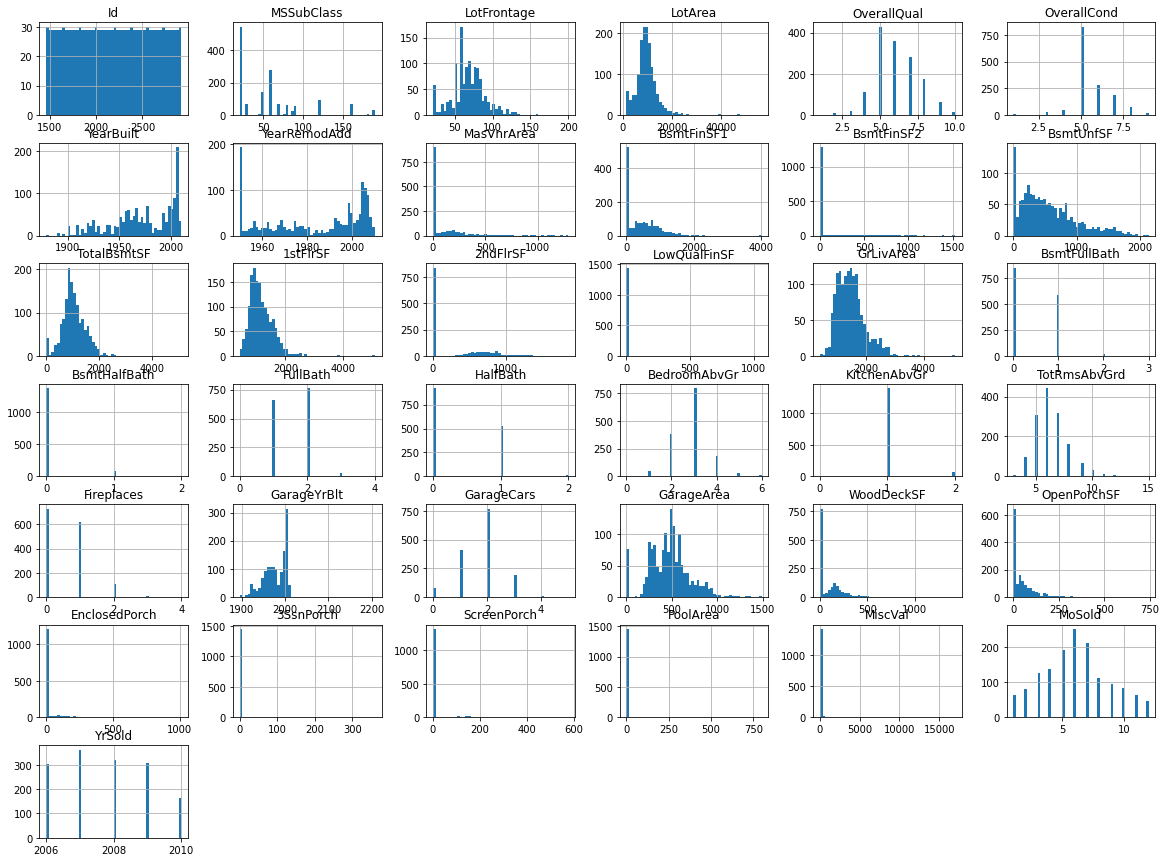

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
sf_test.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
corr_matrix = sf_train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

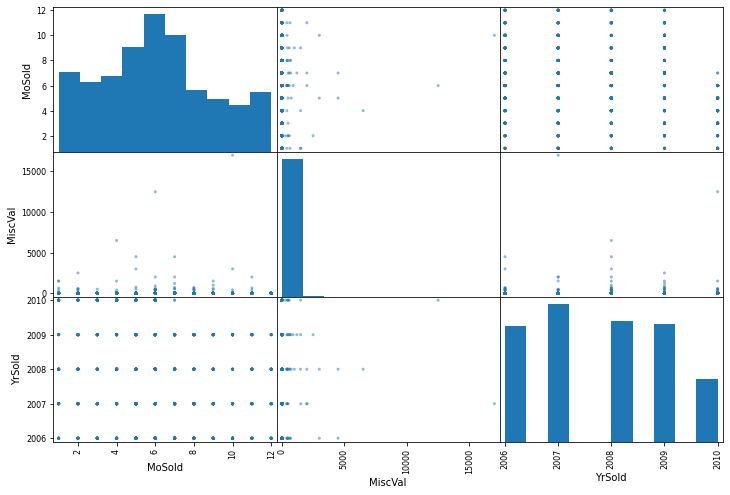

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
attributes = ["MoSold", "MiscVal", "YrSold"]
scatter_matrix(sf_test[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

In [ ]:
sf_test = sf_test[['LotArea', 'MiscVal', 'MoSold', 'YrSold']]
sf_test.head()

,LotArea,MiscVal,MoSold,YrSold
0,11622,0,6,2010
1,14267,12500,6,2010
2,13830,0,3,2010
3,9978,0,6,2010
4,5005,0,1,2010


In [ ]:
X = sf_test[['LotArea', 'MiscVal', 'YrSold']]
y = sf_test['MoSold']

X_sf_train = sf_train[['MiscVal', 'MoSold', 'YrSold']]

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

In [ ]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.0216


In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE is: \n', mean_squared_error(y_test, y_pred))

RMSE is: 
 7.117519278229222


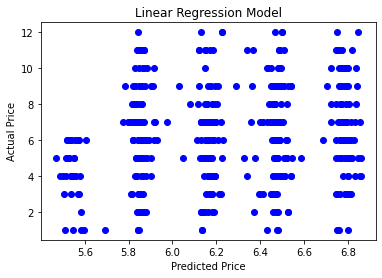

In [ ]:

actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=1,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [ ]:
print("R^2 is: \n", regressor.fit(X_test, y_test).score(X_test, y_test))

R^2 is: 
 0.021615218746788845


In [ ]:

from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
feature_labels = np.array(['LotArea', 'MiscVal', 'YrSold'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

MiscVal-2.88%
YrSold-32.25%
LotArea-64.86%


In [ ]:

predict_testData = regressor.fit(X_test, y_test).predict(X_sf_train)
final_predictions = np.exp(predict_testData)

In [ ]:
print("Predicted: \n", predict_testData[:10], "\n")
print("Final Predictied: \n", final_predictions[:10])

Predicted: 
 [6.24817841 6.55985223 6.24897105 6.87084665 6.24931075 5.93137521
 6.56019193 5.93467592 6.24840488 6.24806518] 

Final Predictied: 
 [517.07007741 706.16733799 517.48008885 963.7641907  517.65590755
 376.67216013 706.40726494 377.91750061 517.18719038 517.01153088]
